In [124]:
import numpy as np
import pandas as pd
import plotly.offline as py 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

from numpy.random import seed
seed = np.random.seed(334)

from collections import Counter
from pandas import DataFrame
from pandas import read_csv
from numpy import concatenate 
from numpy import newaxis
from math import sqrt 
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style = 'white', context = 'notebook', palette = 'deep')
py.init_notebook_mode(connected = True)

### Load Data

In [178]:
cdata = pd.read_csv('adult.csv')
cdata.isnull().sum()
cdata = cdata.fillna(np.nan)
cdata.dtypes

cdata = cdata[cdata.occupation != '?']

In [179]:
cdata['income'] = cdata['income'].map({'<=50K':0, '>50K':1})
cdata

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,1
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,1


In [100]:
num_features = cdata.select_dtypes(include = ['int64'])
cat_features = cdata.select_dtypes(include = ['object'])

## Exploring Features

In [187]:
print(cdata['sex'].value_counts())
print(cdata['income'].value_counts())

Male      20788
Female     9930
Name: sex, dtype: int64
0    23068
1     7650
Name: income, dtype: int64


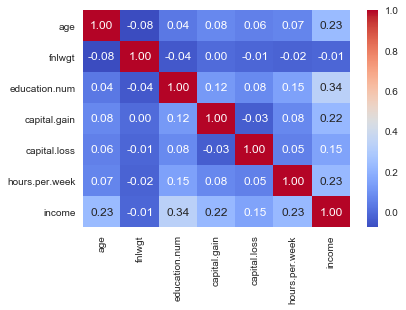

In [44]:
#Correlation Matrix
corr = sns.heatmap(num_features.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")

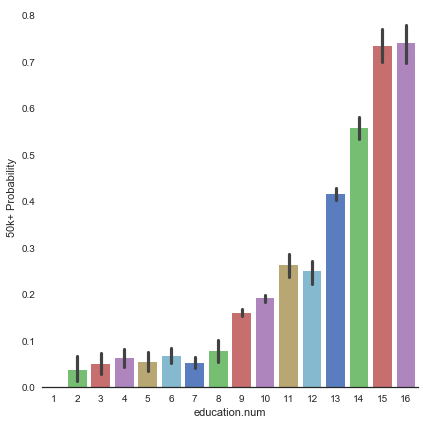

In [11]:
EduPlot = sns.factorplot(x ="education.num", y="income", data = cdata, kind = "bar", size = 6, palette = "muted")
EduPlot.despine(left = True)
EduPlot = EduPlot.set_ylabels("50k+ Probability")

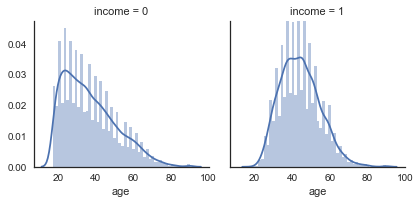

In [45]:
AgeP = sns.FacetGrid(cdata, col='income')
AgeP = AgeP.map(sns.distplot, "age")

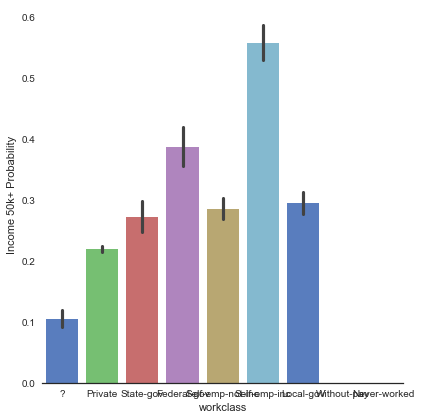

In [51]:
# Working Class Categorys
WorkP = sns.factorplot(x = "workclass", y="income", data = cdata, kind = "bar", size = 6, palette = "muted")
WorkP.despine(left = True)
WorkP = WorkP.set_ylabels("Income 50k+ Probability")

### Feature Manipulation

In [153]:
cdata2 = cdata.copy(deep = True)

In [116]:
#cdata['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [154]:
#Class, Race, Relationship Status
cdata2['workclass'] = cdata2.workclass.map({'Private':0, 'State-gov':1,
                                            'Federal-gov':2, 'Self-emp-not-inc':3,
                                            'Self-emp-inc':4, 'Local-gov':5,
                                            'Without-pay':6})

cdata2['race'] = cdata2.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2,
                                      'Amer-Indian-Eskimo':3, 'Other':4})

cdata2['relationship'] = cdata2.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0,
                                             'Other-relative':0, 'Husband':1, 'Wife':1})

In [155]:
#Male and Female
cdata2['sex'] = cdata2.sex.map({"Female":0, "Male":1})

#Marital Status
cdata2['marital.status'] = cdata2['marital.status'].replace(['Never-married', 'Divorced', 
                                                             'Separated', 'Widowed'], 'Single')                                  

cdata2['marital.status'] = cdata2['marital.status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 
                                                             'Married-AF-spouse'], 'Married')                                  

cdata2['marital.status'] = cdata2['marital.status'].map({"Married":1, "Single":0})
cdata2['marital.status'] = cdata2['marital.status'].astype(int)                                                        

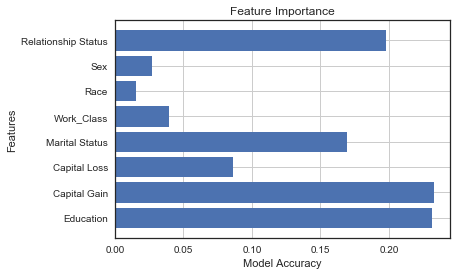

In [156]:
#Feature Importance Bar Chart
y = cdata2['income']
X = cdata2[['education.num', 'capital.gain', 'capital.loss',
         'marital.status', 'workclass', 'race', 'sex', 'relationship']]

model = ExtraTreesClassifier(n_estimators = 250, random_state = 0)
model.fit(X,y)

val = model.feature_importances_

pos = np.arange(8) + 0.5
plt.barh(pos, val, align = 'center')
plt.title('Feature Importance')
plt.xlabel('Model Accuracy')
plt.ylabel('Features')
plt.yticks(pos, ('Education', 'Capital Gain', 'Capital Loss', 'Marital Status', 'Work_Class', 'Race', 
                'Sex', 'Relationship Status'))

plt.grid(True)


In [157]:
cdata3 = cdata2.copy(deep = True)
drop_labels = ['sex', 'race', 'workclass', 'occupation', 'native.country', 'education']

cdata3.drop(drop_labels, axis = 1, inplace = True)

print(cdata3.head())

   age  fnlwgt  education.num  marital.status  relationship  capital.gain  \
1   82  132870              9               0             0             0   
3   54  140359              4               0             0             0   
4   41  264663             10               0             0             0   
5   34  216864              9               0             0             0   
6   38  150601              6               0             0             0   

   capital.loss  hours.per.week  income  
1          4356              18       0  
3          3900              40       0  
4          3900              40       0  
5          3770              45       0  
6          3770              40       0  


### Modeling | Logistic and Random Forest

In [166]:
#Create X and Y, Train/Test Split (80/20)
array = cdata3.values
X = array[:,0:8]
Y = array[:,8]
val_size = 0.2
scoring = 'accuracy'

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size = val_size, 
                                                    random_state = seed)

In [171]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, Y_train)
predictionsLR = LRmodel.predict(X_test)

print("Accuracy: %s%%" % (100*accuracy_score(Y_test, predictionsLR)))
print(confusion_matrix(Y_test, predictionsLR))
print(classification_report(Y_test, predictionsLR))

Accuracy: 79.31315104166666%
[[4480  184]
 [1087  393]]
             precision    recall  f1-score   support

          0       0.80      0.96      0.88      4664
          1       0.68      0.27      0.38      1480

avg / total       0.77      0.79      0.76      6144



In [172]:
rfmodel = RandomForestClassifier(n_estimators = 250, max_features = 3)
rfmodel.fit(X_train,Y_train)
predictions = rfmodel.predict(X_test)

print("Accuracy: %s%%" % (100*accuracy_score(Y_test, predictions)))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy: 83.935546875%
[[4254  410]
 [ 577  903]]
             precision    recall  f1-score   support

          0       0.88      0.91      0.90      4664
          1       0.69      0.61      0.65      1480

avg / total       0.83      0.84      0.84      6144

